In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri setini okuduk.
raw_data = pd.read_csv("creditcard.csv")
raw_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Elimizdeki veri ile ilgili detaylara baktık.
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Veri Analizi

In [4]:
raw_data.isna().sum().max() # Veri seti içerisinde boş veri var mı diye kontrol ediyoruz.

0

In [5]:
dups = raw_data.duplicated()  # Tekrarlanan veri sayısını gösterir.
print(dups.sum())

1081


In [6]:
raw_data = raw_data.drop_duplicates() # Tekrarlanan satırları sildik.

In [7]:
raw_data["Class"].value_counts()*100/len(raw_data) # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte), 0 ise normal kredi kartı olduğunu gösterir.

0    99.83329
1     0.16671
Name: Class, dtype: float64

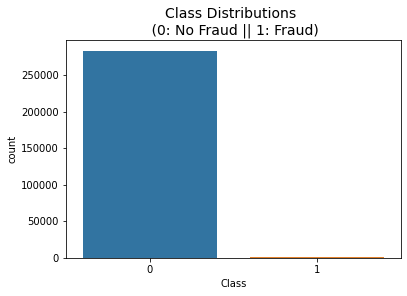

In [8]:
# Class sütunun grafik üzerinden gösterilmesi
sns.countplot(x='Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

In [9]:
# Scale edilmemiş Time ve amount sütunlarını scale ettik.
from sklearn.preprocessing import StandardScaler,RobustScaler

scaler = RobustScaler()
raw_data["Scaled_amount"] = scaler.fit_transform(raw_data["Amount"].values.reshape(-1,1))
raw_data["Scaled_time"] = scaler.fit_transform(raw_data["Time"].values.reshape(-1,1))
raw_data.drop(["Amount","Time"],axis=1,inplace=True)

raw_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [10]:
fraud = raw_data[raw_data['Class']==1] # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte) olduğunu gösterir.

normal = raw_data[raw_data['Class']==0] # Class sütunu eğer 0 ise bu bize kredi kartının normal olduğunu gösterir.

In [11]:
print("Sahte Kredi Kartı verileri: ", fraud.shape) # Sahte kart verileri
print("Normal Kredi Kartı verileri: ", normal.shape) # Normal kart verileri

Sahte Kredi Kartı verileri:  (473, 31)
Normal Kredi Kartı verileri:  (283253, 31)


In [12]:
normal_data = normal.sample(frac = 0.1,random_state=1) # Çok fazla datamız vardı. Belirli sayıda örnek alarak veri setimizi biraz küçülttük.
normal_data.shape

(28325, 31)

In [13]:
frames = [normal_data, fraud] # Yeni data seti oluşturmak için normal ve hileli kredi kartı verilerini birleştirdik.
result = pd.concat(frames)

In [14]:
data = result.sample(frac=1).reset_index(drop=True)  # Elimizdeki veri setini azaltarak 1 olan değerleri karıştırdık.
data.shape
raw_data = data

In [15]:
fraud = data[data['Class']==1] # Class sütunu eğer 1 ise bu bize kredi kartının fraud (sahte) olduğunu gösterir.

normal = data[data['Class']==0] # Class sütunu eğer 0 ise bu bize kredi kartının normal olduğunu gösterir.

outlier_fraction = len(fraud)/float(len(normal))

In [16]:
# Over sampling
raw_data_0 = raw_data[raw_data["Class"]==0] # Sadece 0 etiketli veri
raw_data_1 = raw_data[raw_data["Class"]==1] # Sadece 1 etiketli veri
data_0_count = len(raw_data_0) # 0 değerli datanın sayısı
data_1_count = len(raw_data_1) # 1 değerli datanın sayısı
data_1 = raw_data_1.sample(data_0_count,replace=True) # Over sampling işlemi
data = pd.concat([raw_data_0, data_1], axis=0,ignore_index=True) # Over samplingten sonra datanın birleştirilmesi
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaled_amount,Scaled_time
0,0.954865,-0.244119,0.264767,1.561139,-0.568417,-0.636160,0.242052,-0.123669,0.454282,-0.107408,...,-0.333833,-0.193935,0.363180,0.649296,-0.351681,-0.008732,0.039545,0,1.627034,-0.270909
1,2.041619,-0.103121,-1.175985,0.224638,0.078059,-0.703875,0.081561,-0.172844,0.289436,0.239769,...,-0.637847,0.286970,-0.333396,-0.282717,0.197957,-0.074388,-0.073121,0,-0.278404,0.780185
2,-1.139274,1.386378,-1.858182,-1.829759,3.284673,4.134239,-0.170291,-3.670261,0.421286,0.142087,...,-0.995923,0.229664,0.657652,0.174101,-0.305915,-0.173736,-0.375536,0,0.111111,0.466142
3,-0.061090,-0.291180,-0.049596,-3.023064,0.593581,-1.097528,0.988034,-0.640724,-2.573528,0.863103,...,0.509325,-0.377638,0.759987,0.450937,-0.061865,-0.103811,-0.100074,0,0.041719,0.558288
4,-0.750918,-0.896522,-1.389595,0.157830,2.296464,-1.951095,0.053758,0.074596,0.564887,-1.180468,...,0.330427,0.556141,-0.573688,-1.683197,-0.654647,0.308400,0.419663,0,0.528438,0.479656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56645,-1.109646,0.811069,-1.138135,0.935265,-2.330248,-0.116106,-1.621986,0.458028,-0.912189,-2.961996,...,0.841755,0.176728,0.081004,-0.258899,0.707654,0.418649,0.080756,1,2.534696,-0.489633
56646,-0.361428,1.133472,-2.971360,-0.283073,0.371452,-0.574680,4.031513,-0.934398,-0.768255,-2.248115,...,0.563861,-0.408436,-0.880079,1.408392,-0.137402,-0.001250,-0.182751,1,6.379085,0.556960
56647,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,-9.222826,...,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1,1.084550,-0.698780
56648,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,-13.320789,...,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,1,4.089278,0.107652


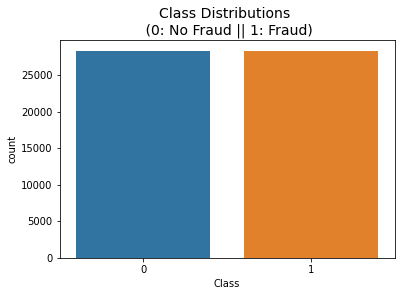

In [17]:
# Veri seti dengelendikten sonraki grafiksel gösterimi
sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

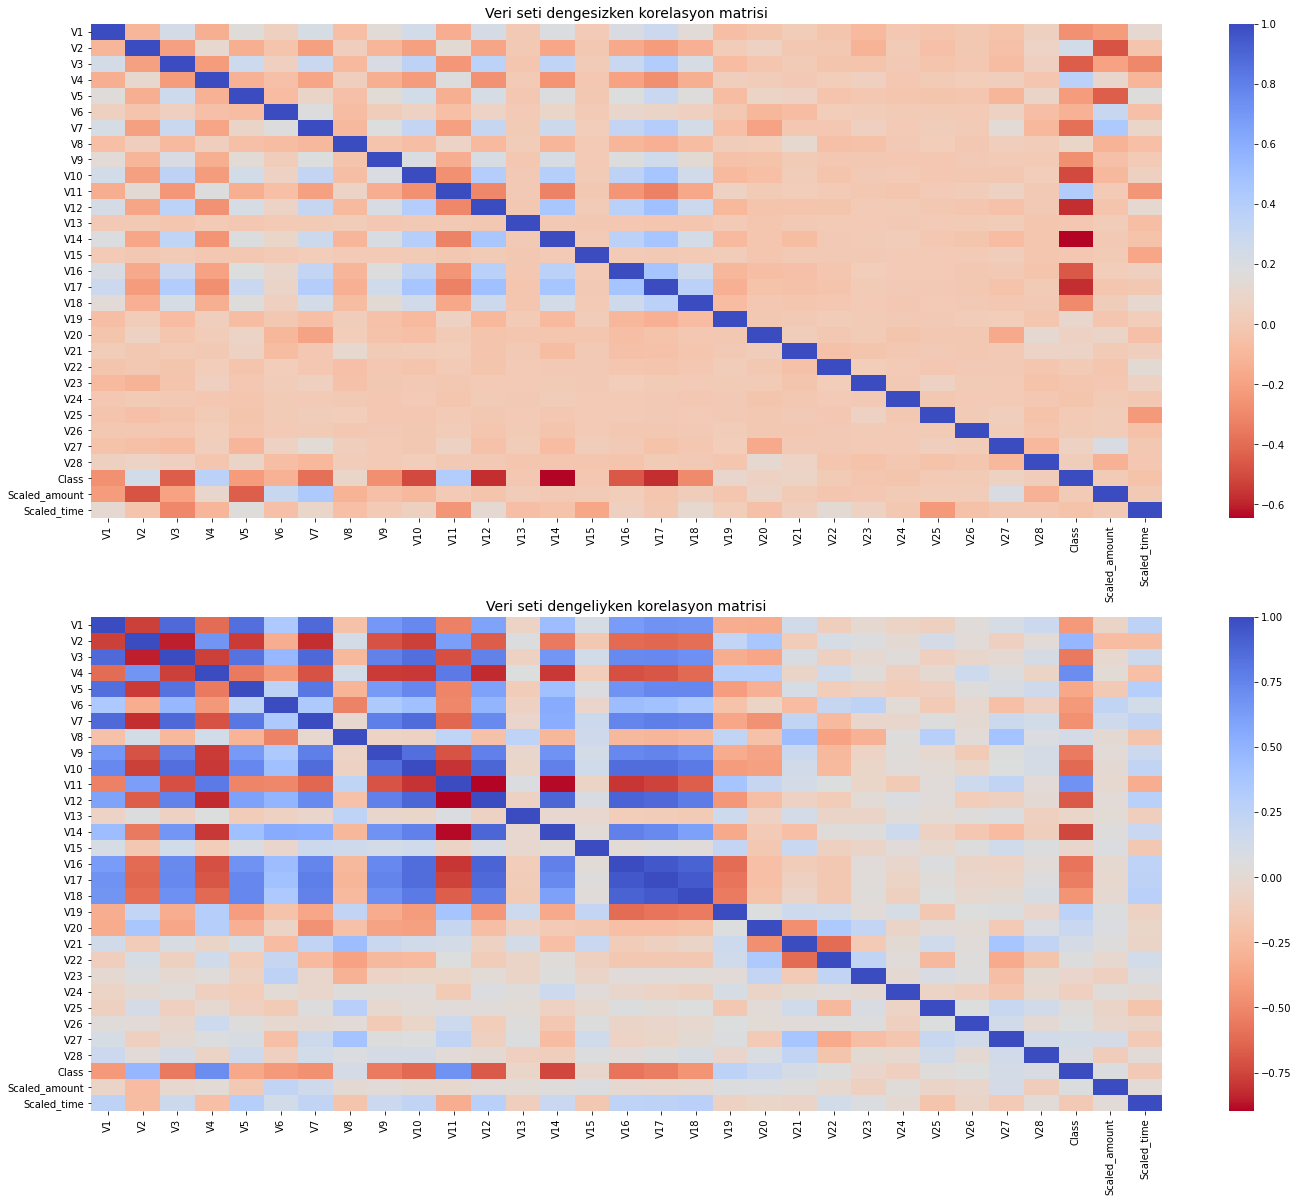

In [18]:
# Korelasyon matrisi
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Veri setinin korelasyon matrisi
corr = raw_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Veri seti dengesizken korelasyon matrisi", fontsize=14)

# Correlation matrix of over sampling data
sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Veri seti dengeliyken korelasyon matrisi', fontsize=14)
plt.show()

#### Summary and Explanation:

Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.

Positive Correlations: V2, V4, V11, and V19 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.

BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.

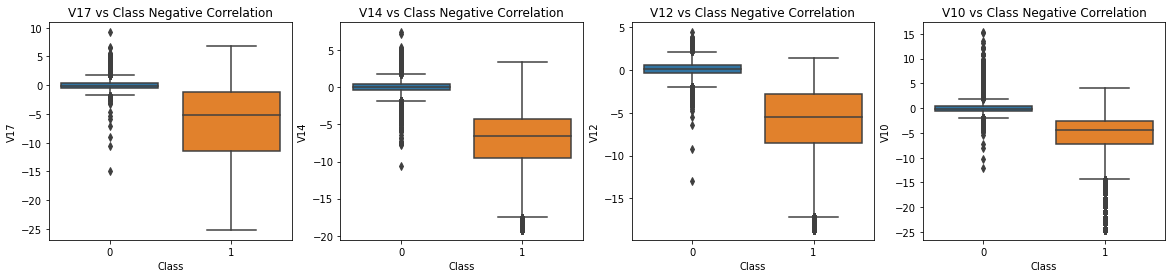

In [19]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

neg_corr = ["V17","V14","V12","V10"]
for i,v in enumerate(neg_corr,0):
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

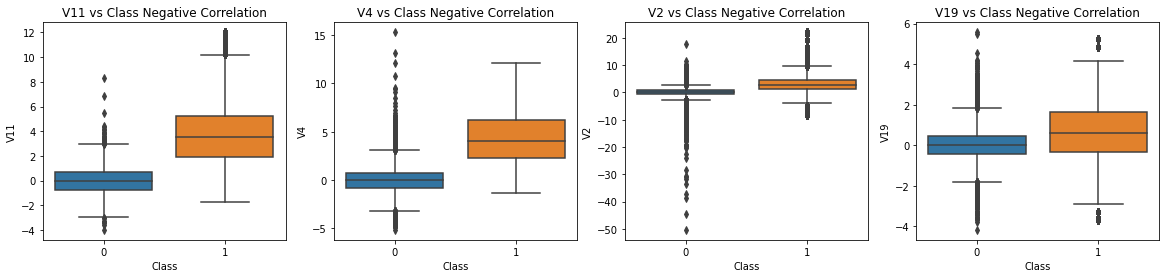

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

pos_corr = ["V11","V4","V2","V19"]
for i,v in enumerate(pos_corr,0):
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
    sns.boxplot(x="Class", y=v, data=data, ax=axes[i])
    axes[i].set_title(f'{v} vs Class Negative Correlation')

plt.show()

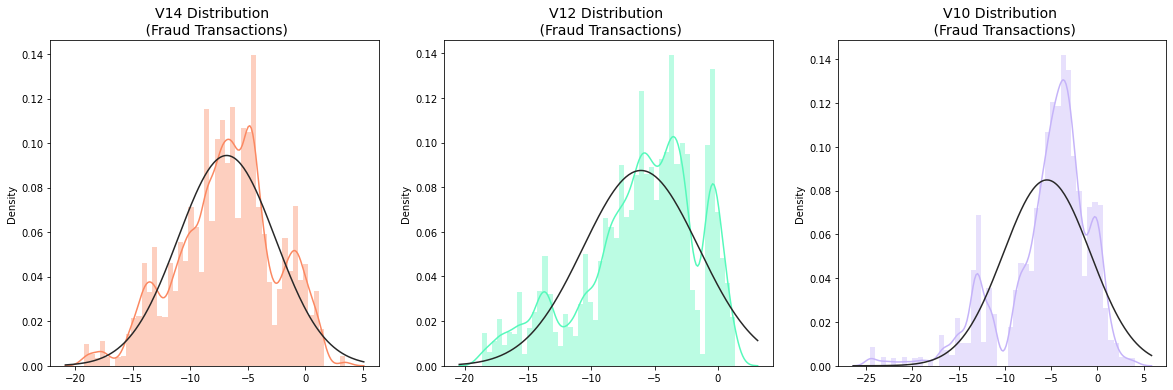

In [21]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = data['V14'].loc[data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = data['V12'].loc[data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = data['V10'].loc[data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [22]:
# Over sampling
X = data.drop("Class",axis=1)
y = data["Class"]

In [23]:
# Dimensionality Reduction with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2,random_state=0)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ -9.07019215,   1.16852079],
       [ -9.1978168 ,   1.12188283],
       [ -8.99901653,   2.75380576],
       ...,
       [ 33.59113626,   2.88766954],
       [ 32.50029102, -10.22368938],
       [ -8.02284965,   2.57894388]])

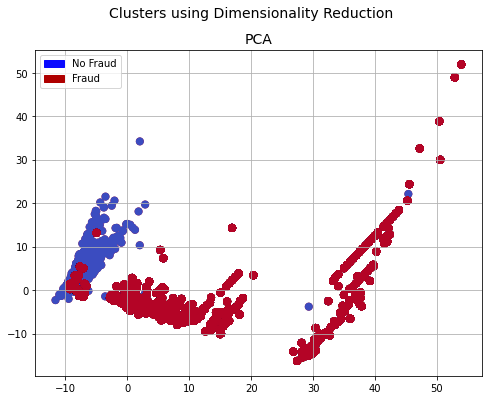

In [24]:
import matplotlib.patches as mpatches
f, ax = plt.subplots(1, 1, figsize=(8,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# PCA scatter plot
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced[:,0], X_reduced[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch]);

In [25]:
# Split the dataset to training and testing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
# Classifiers
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=10, 
                                       contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "One Class Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

classifiers_predicted = {
    "Isolation Forest": None,
    "Local Outlier Factor": None,
    "One Class Support Vector Machine": None
}

In [27]:
n_outliers = len(fraud)
print("\nALGORİTMA SONUÇLARI")
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "One Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
   
   
    print("\n")
    print("{}: {}".format(clf_name,n_errors), "\n")
    sayi = accuracy_score(y,y_pred)*100
    sayi = round(sayi,2)
    print("Accuracy Score: ", "%",sayi, "\n")
    print("Classification Report:")
    print(classification_report(y,y_pred))


ALGORİTMA SONUÇLARI


Isolation Forest: 27391 

Accuracy Score:  % 51.65 

Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67     28325
           1       1.00      0.03      0.06     28325

    accuracy                           0.52     56650
   macro avg       0.75      0.52      0.37     56650
weighted avg       0.75      0.52      0.37     56650



Local Outlier Factor: 29257 

Accuracy Score:  % 48.35 

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.97      0.65     28325
           1       0.01      0.00      0.00     28325

    accuracy                           0.48     56650
   macro avg       0.25      0.48      0.33     56650
weighted avg       0.25      0.48      0.33     56650



One Class Support Vector Machine: 19136 

Accuracy Score:  % 66.22 

Classification Report:
              precision    recall  f1-score   support

           0    

## Gözlem ve Sonuçlar :

<ul>
<li>Isolation Forest detected 73 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 8516 errors</li>
<li>Isolation Forest has a 99.74% more accurate than LOF of 99.65% and SVM of 70.09</li>
<li>When comparing error precision & recall for 3 models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % and SVM of 0%.</li>
<li>So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.</li>
<li>We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases</li>
</ul>